<h1 align='center'>Project Loan Prediction Approval</h1>
<h4 align='center'>By Juang Hudaya</h4>



Data Set Description 🧾

👉 There are 13 variables in this data set:

8 categorical variables,
4 continuous variables, and
1 variable to accommodate the loan ID.

The following is the structure of the data set.

Variable Name	Description	Sample Data
- **Loan_ID**	Loan reference number
(unique ID)	LP001002; LP001003; ...
- **Gender**	Applicant gender
(Male or Female)	Male; Female
- **Married**	Applicant marital status
(Married or not married)	Married; Not Married
- **Dependents**	Number of family members	0; 1; 2; 3+
- **Education**	Applicant education/qualification
(graduate or not graduate)	Graduate; Under Graduate
- **Self_Employed**	Applicant employment status
(yes for self-employed, no for employed/others)	Yes; No
- **ApplicantIncome**	Applicant's monthly salary/income	5849; 4583; ...
- **CoapplicantIncome**	Additional applicant's monthly salary/income	1508; 2358; ...
- **LoanAmount**	Loan amount	128; 66; ...
- **Loan_Amount_Term**	The loan's repayment period (in days)	360; 120; ...
- **Credit_History**	Records of previous credit history
(0: bad credit history, 1: good credit history)	0; 1
- **Property_Area**	The location of property
(Rural/Semiurban/Urban)	Rural; Semiurban; Urban
- **Loan_Status**	Status of loan
(Y: accepted, N: not accepted)	Y; N


In [1]:
# ------------------------------ Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

<center><h1 font-size='40px'>Preprocessing and Features Engineering</h1></center>

In [2]:
### The Data

In [3]:
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/loan.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
# Import Dataset
df = pd.read_csv('loan.csv')
#pd.set_option('max_columns',100)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
## checking unique value
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [8]:
##Checking missing data
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
unique_values(df)

,Total,Uniques
Loan_ID,614,614
Gender,601,2
Married,611,2
Dependents,599,4
Education,614,2
Self_Employed,582,2
ApplicantIncome,614,505
CoapplicantIncome,614,287
LoanAmount,592,203
Loan_Amount_Term,600,10


In [10]:
missing_data(df)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Nan values reach above 1%. I decide to impute the missing value.

<center><h1 font-size='40px'>Exploratory Data Analysis</h1></center>
<center><h1 font-size='40px'>(EDA)</h1></center>

## Categorical Variable

### 1. Gender

In [11]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

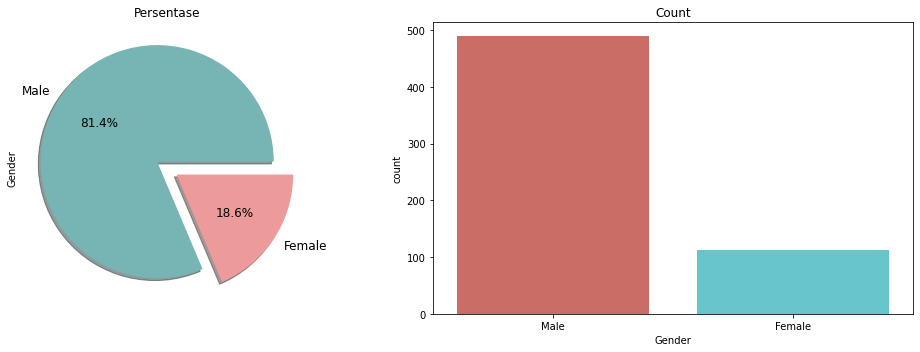

In [12]:
fig, axes = plt.subplots(1,2)

g2 = df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Persentase")
g1 = sns.countplot(x='Gender', data=df, palette='hls')
g1.set_title("Count")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

## 2. Married

In [13]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

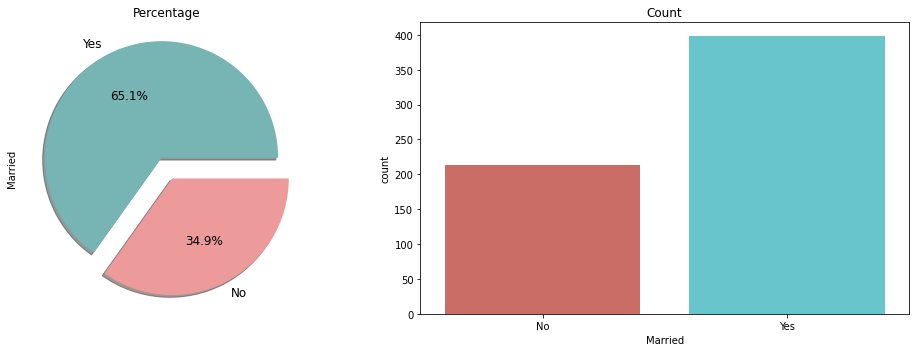

In [14]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Married', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Married'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

### 3. Education

In [15]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

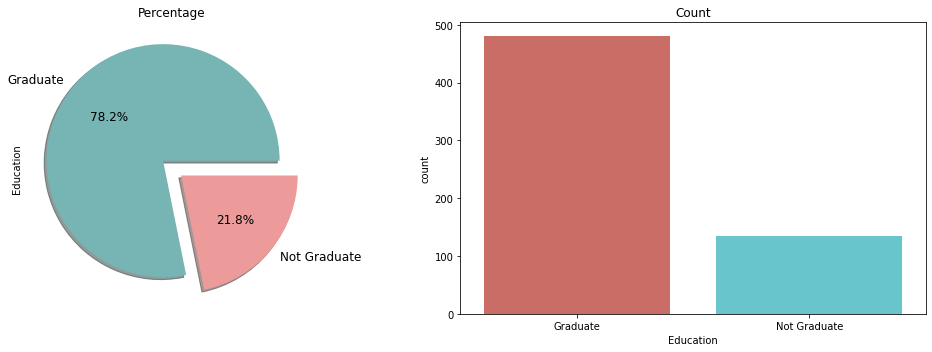

In [16]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Education', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Education'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [17]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

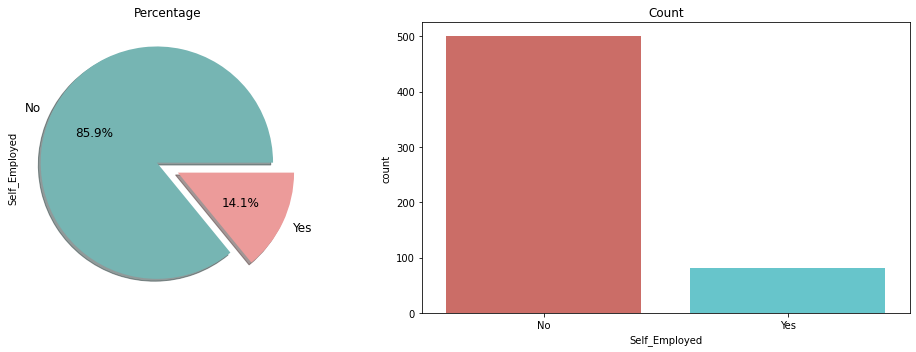

In [18]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Self_Employed', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Self_Employed'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

### 5. Credit History

In [19]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

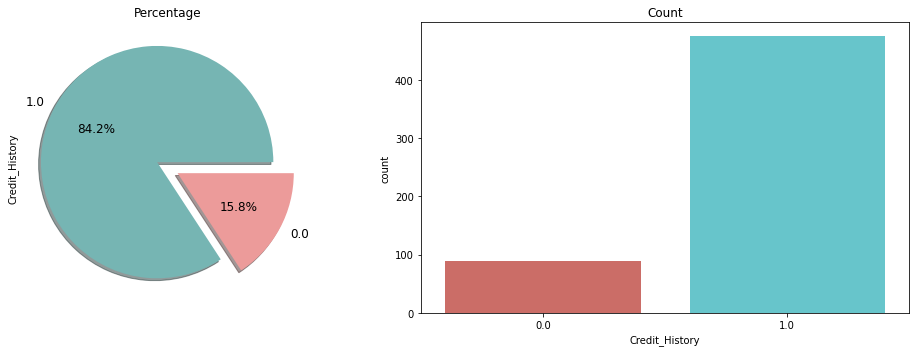

In [20]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Credit_History', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Credit_History'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### 6. Property Area

In [21]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

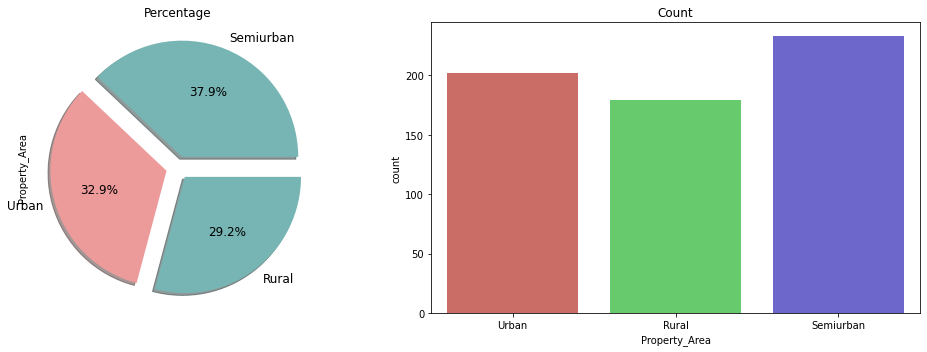

In [22]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Property_Area', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Property_Area'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

### 7. Loan Status

In [23]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

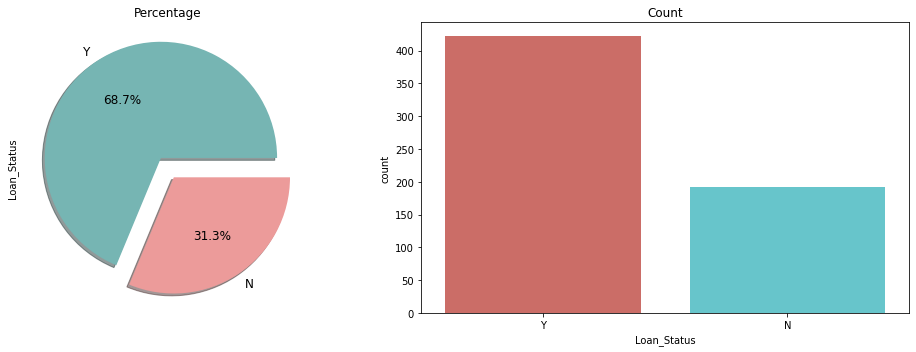

In [24]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Loan_Status', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Loan_Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### 8. Loan Amount Term


In [25]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

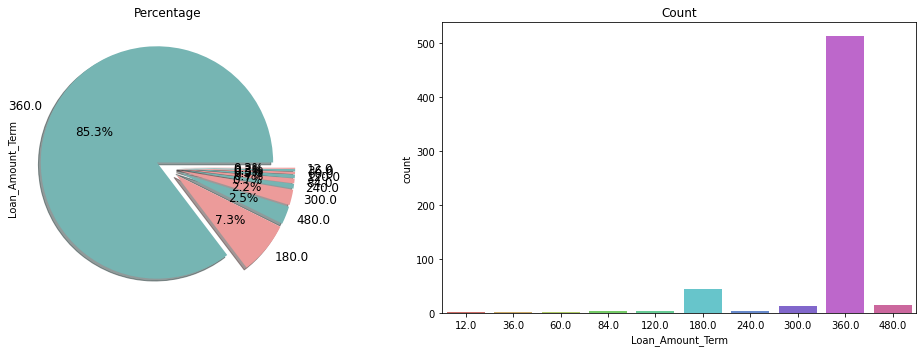

In [26]:
fig, axes = plt.subplots(1,2)

g1 = sns.countplot(x='Loan_Amount_Term', data=df, palette='hls')
g1.set_title("Count")
g2 = df['Loan_Amount_Term'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g2.set_title("Percentage")


fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

 the 360 days loan duration is the most popular compared to others.

## Numerical Variable

In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Correlation Between Features 

### 1.HeatMap

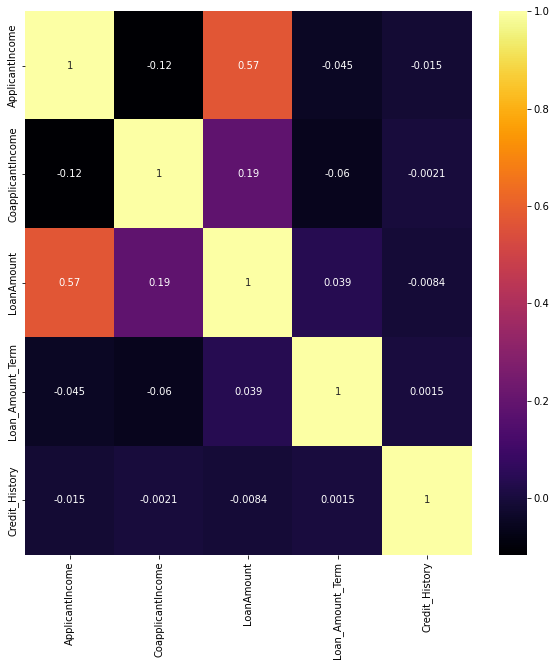

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

There is positive correlation between Loan Amount and Applicant Income

In [29]:
# -- import chi squared
from scipy.stats import chi2_contingency

# -- chi squared contingecy
print('-----','Correlation between loan Amount and Applicant Income','-----' )
stat, p, dof, expected = chi2_contingency(df[['LoanAmount','ApplicantIncome']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

print()


----- Correlation between loan Amount and Applicant Income -----
stat=nan, p=nan
Probably dependent



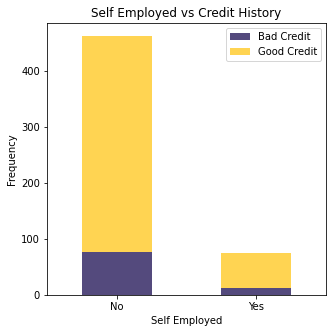

In [30]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

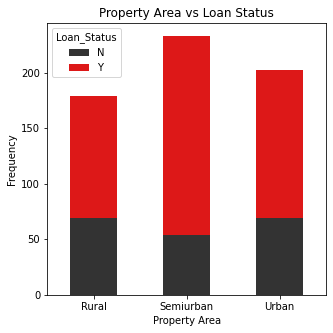

In [31]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### Hypotesis Testing

In [32]:
# updating the numcol and catcol
numcol = df.select_dtypes('number').columns
catcol = df.select_dtypes('object').columns

In [33]:
numcol

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [34]:
from scipy.stats import mannwhitneyu
mann = []
for i in numcol:
    if mannwhitneyu(df[df['Loan_Status'] == 'Y'][i], 
                    df[df['Loan_Status'] == 'N'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [numcol, mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,ApplicantIncome,Fail to Reject Null Hypothesis
1,CoapplicantIncome,Fail to Reject Null Hypothesis
2,LoanAmount,Fail to Reject Null Hypothesis
3,Loan_Amount_Term,Fail to Reject Null Hypothesis
4,Credit_History,Reject Null Hypothesis


In [35]:
catcol

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
# Categorical column
bank_dummies = df.drop('Loan_Status', axis = 1)

In [37]:
bank_dummies = bank_dummies.drop('Loan_ID', axis = 1)

In [38]:
dum_catcol = bank_dummies.select_dtypes('object').columns
dum_catcol

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [39]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in dum_catcol:
    if chi2_contingency(pd.crosstab(df['Loan_Status'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

In [40]:
res_cat = pd.DataFrame(data = [dum_catcol, chi2_check] 
             ).T 
res_cat.columns = ['Column', 'Hypothesis']
res_cat

,Column,Hypothesis
0,Gender,Fail to Reject Null Hypothesis
1,Married,Reject Null Hypothesis
2,Dependents,Fail to Reject Null Hypothesis
3,Education,Reject Null Hypothesis
4,Self_Employed,Fail to Reject Null Hypothesis
5,Property_Area,Reject Null Hypothesis


## Data Preprocessing

### 1.Drop Unecessary Variables

In [41]:
df = df.drop(['Loan_ID'], axis = 1)

### 2. Data Imputation
Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

In [42]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

### 3. One-hot Encoding
In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [43]:
df = pd.get_dummies(df)

In [44]:
# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [45]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

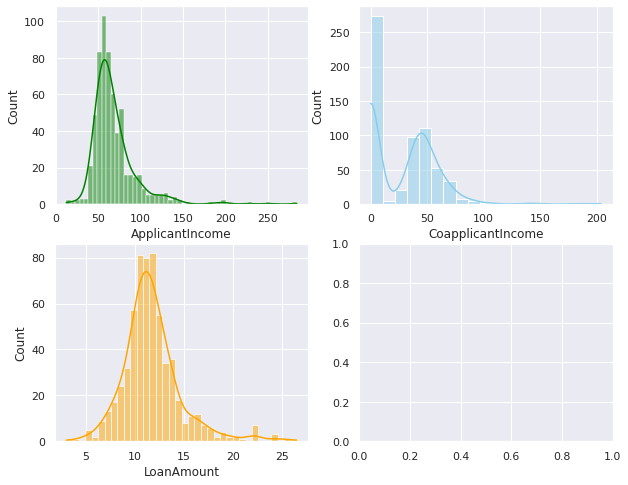

In [46]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [47]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,67.697858,38.832976,11.313708,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,53.851648,0.000000,8.426150,360.0,1.0,0,0,1,0,0,0,1,0,1,0,0,1
610,64.078077,0.000000,6.324555,180.0,1.0,1,1,0,0,0,1,1,0,1,0,0,1
611,89.844310,15.491933,15.905974,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,1
612,87.080423,0.000000,13.674794,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    uint8  
 6   Married                  614 non-null    uint8  
 7   Dependents_0             614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Dependents_3+            614 non-null    uint8  
 11  Education                614 non-null    uint8  
 12  Self_Employed            614 non-null    uint8  
 13  Property_Area_Rural      614 non-null    uint8  
 14  Property_Area_Semiurban  6

## Setting Features and Target, Train Test Split, and SMOTE for Train Data

I will use this setting features target and train test split for the model that I have prepared which is Light GBM. But later, I will do another train test split and SMOTE for finding other algorithms that may be have good result than Light BGM that I have prepared.


In [49]:
# ------- Setting Features and Target
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

# ------- Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

### Light GBM

I have tried to use Light GBM with hyperparameter which are :
`{'learning_rate': 0.01, 'max_depth': -1, 'min_data_in_leaf': 60, 'num_iterations': 200, 'num_leaves': 70}`

But before modelling, I will standardize the continous data first.

In [50]:
#from sklearn.preprocessing import MinMaxScaler
#X = MinMaxScaler().fit_transform(X)

In [51]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
1,67.697858,38.832976,11.313708,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,53.851648,0.000000,8.426150,360.0,1.0,0,0,1,0,0,0,1,0,1,0,0
610,64.078077,0.000000,6.324555,180.0,1.0,1,1,0,0,0,1,1,0,1,0,0
611,89.844310,15.491933,15.905974,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1
612,87.080423,0.000000,13.674794,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1


In [52]:
# Standar Scaler
## I separate it to make it easier when I use it to dashboard
scalernormal_app = StandardScaler()
scalernormal_co = StandardScaler()
scalernormal_loanamount = StandardScaler()
scalernormal_term = StandardScaler()


# Fit transform X_train
scaledapp = list(scalernormal_app.fit_transform(X_train[['ApplicantIncome']])[:,0])
X_train['ApplicantIncome'] = scaledapp
# ------
scaledco = list(scalernormal_co.fit_transform(X_train[['CoapplicantIncome']])[:,0])
X_train['CoapplicantIncome'] = scaledco
# ------
scaledloanamount = list(scalernormal_loanamount.fit_transform(X_train[['LoanAmount']])[:,0])
X_train['LoanAmount'] = scaledloanamount
# -----
scaledterm = list(scalernormal_term.fit_transform(X_train[['Loan_Amount_Term']])[:,0])
X_train['Loan_Amount_Term'] = scaledterm
# -----


# Fit transform X_test
scaledapptest = list(scalernormal_app.transform(X_test[['ApplicantIncome']])[:,0])
X_test['ApplicantIncome'] =  scaledapptest
# -----
scaledcotest = list(scalernormal_co.transform(X_test[['CoapplicantIncome']])[:,0])
X_test['CoapplicantIncome'] = scaledcotest
# -----
scaledloanamounttest = list(scalernormal_loanamount.transform(X_test[['LoanAmount']])[:,0])
X_test['LoanAmount'] = scaledloanamounttest
# -----
scaledtermtest = list(scalernormal_term.transform(X_test[['Loan_Amount_Term']])[:,0])
X_test['Loan_Amount_Term'] = scaledtermtest
# -----


In [53]:
# Light GBM with Hyperparameter that has prepared
LGBM_Model = LGBMClassifier(random_state=101,learning_rate=0.01,max_depth=-1,min_data_in_leaf=60,num_iterations=200,num_leaves=70)
LGBM_Model.fit(X_train,y_train)
PredictionLGBM = LGBM_Model.predict(X_test)
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,PredictionLGBM))
print()
tn, fp, fn, tp = confusion_matrix(y_test,PredictionLGBM).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.95      0.41      0.58        46
           1       0.84      0.99      0.91       139

    accuracy                           0.85       185
   macro avg       0.89      0.70      0.74       185
weighted avg       0.86      0.85      0.83       185


tn :  19  fp :  27  fn :  1  tp :  138


In [54]:
# Try with Threshold
pred_proba = LGBM_Model.predict_proba(X_test)


# Adjust threshold for predictions proba
prediction_with_threshold = []
for item in pred_proba[:,0]:
    if item > 0.22 :
        prediction_with_threshold.append(0)
    else:
        prediction_with_threshold.append(1)
        
print('=============== CLASSIFICATION REPORT WITH THRESHOLD ===============')
print(classification_report(y_test,prediction_with_threshold))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_with_threshold).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT WITH THRESHOLD ===============
              precision    recall  f1-score   support

           0       0.31      0.85      0.45        46
           1       0.88      0.37      0.52       139

    accuracy                           0.49       185
   macro avg       0.59      0.61      0.48       185
weighted avg       0.74      0.49      0.50       185


tn :  39  fp :  7  fn :  88  tp :  51


In [55]:
# feature importances
score = pd.DataFrame(LGBM_Model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score.head()

,Score,Column
0,228,ApplicantIncome
1,65,CoapplicantIncome
2,121,LoanAmount
3,0,Loan_Amount_Term
4,200,Credit_History


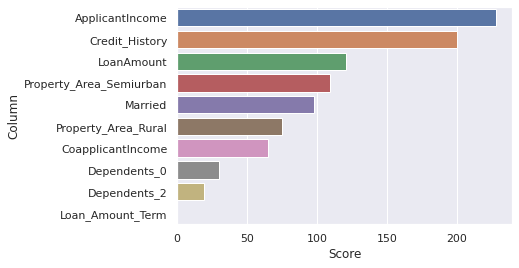

In [56]:
# Make plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column')

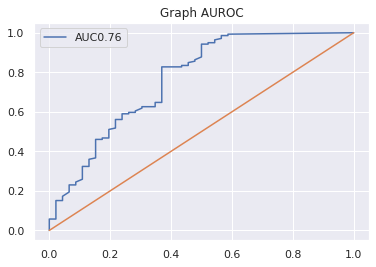

In [57]:
# -------- AUC-ROC Curve
pred_proba = LGBM_Model.predict_proba(X_test)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

### Setting New Features and New Target, New Train Test Split, and SMOTE for Train Data

Next I will try to find other algorithms that may be give better result than algorithm that I used before. I will use this new features and target for the next process untill best tuning hyperparameter. But before start to modelling, I will standardize the continues data first like previous one.

In [58]:
# Setting Features and Target
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# SMOTE (get X_train_smote, y_train_smote)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

# So we have new x_train, x_train_smote, and x_test
## we need to duplicate x_test, because one x_test will get standardize from normal x_train and the other one from SMOTE X_train
X_test_normal = X_test.copy()
X_test_smote = X_test.copy()

In [59]:
# Standar Scaler
## I separate it to make it easier when I use it to dashboard
scalernormal_app = StandardScaler()
scalernormal_co = StandardScaler()
scalernormal_loanamount = StandardScaler()
scalernormal_term = StandardScaler()


# Fit transform X_train
scaledapp = list(scalernormal_app.fit_transform(X_train[['ApplicantIncome']])[:,0])
X_train['ApplicantIncome'] = scaledapp
# ------
scaledco = list(scalernormal_co.fit_transform(X_train[['CoapplicantIncome']])[:,0])
X_train['CoapplicantIncome'] = scaledco
# ------
scaledloanamount = list(scalernormal_loanamount.fit_transform(X_train[['LoanAmount']])[:,0])
X_train['LoanAmount'] = scaledloanamount
# -----


# Fit transform X_test
scaledapptest = list(scalernormal_app.transform(X_test_normal[['ApplicantIncome']])[:,0])
X_test['ApplicantIncome'] =  scaledapptest
# -----
scaledcotest = list(scalernormal_co.transform(X_test_normal[['CoapplicantIncome']])[:,0])
X_test['CoapplicantIncome'] = scaledcotest
# -----
scaledloanamounttest = list(scalernormal_loanamount.transform(X_test_normal[['LoanAmount']])[:,0])
X_test['LoanAmount'] = scaledloanamounttest
# -----



# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# Standar Scaler for normal data
## I separate it to make it easier when I use it to dashboard
scalersmote_app = StandardScaler()
scalersmote_co = StandardScaler()
scalersmote_loanamount = StandardScaler()


# Fit transform X_train
scaledappsmote = list(scalersmote_app.fit_transform(X_train_smote[['ApplicantIncome']])[:,0])
X_train_smote['ApplicantIncome'] = scaledappsmote
# ------
scaledcosmote = list(scalersmote_co.fit_transform(X_train_smote[['CoapplicantIncome']])[:,0])
X_train_smote['CoapplicantIncome'] = scaledcosmote
# ------
scaledloanamountsmote = list(scalersmote_loanamount.fit_transform(X_train_smote[['LoanAmount']])[:,0])
X_train_smote['LoanAmount'] = scaledloanamountsmote
# -----


# Fit transform X_test
scaledapptestsmote = list(scalersmote_app.transform(X_test_smote[['ApplicantIncome']])[:,0])
X_test_smote['ApplicantIncome'] =  scaledapptestsmote
# -----
scaledcotestsmote = list(scalersmote_co.transform(X_test_smote[['CoapplicantIncome']])[:,0])
X_test_smote['CoapplicantIncome'] = scaledcotestsmote
# -----
scaledloanamounttestsmote = list(scalersmote_loanamount.transform(X_test_smote[['LoanAmount']])[:,0])
X_test_smote['LoanAmount'] = scaledloanamounttestsmote
# -----




### F1 Score from All Algorithms

**I will use several algorithms for this binary classification, which are :**
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. LGBM Classifier
5. KNN

**Objective :** Find the best F1_Score with cross_val_method for normal data and SMOTE data

In [60]:
# F1 Score from Normal Train Data (without SMOTE)
# Using F1 Score because the data imbalance, so can't trust to accuracy

algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LGBMClassifier, KNeighborsClassifier]
algo_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','LGBMClassifier','KNeighborsClassifier']
algo_F1Score = []

for item in algorithm:
  model = item()
  F1Scores = cross_val_score(model,X_train,y_train,cv=5,scoring='f1').mean()
  algo_F1Score.append(F1Scores)

df_algo = pd.DataFrame({
    'Algorithm' : algo_name,
    'F1 Score' : algo_F1Score,
})

df_algo

,Algorithm,F1 Score
0,LogisticRegression,0.882089
1,DecisionTreeClassifier,0.808972
2,RandomForestClassifier,0.875497
3,LGBMClassifier,0.854827
4,KNeighborsClassifier,0.810963


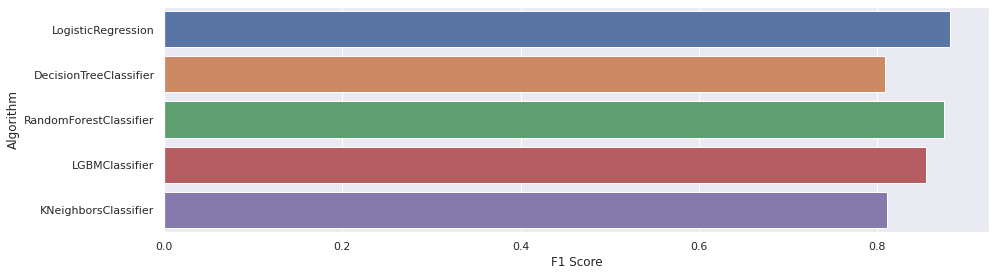

In [61]:
# Plot F1 Score from Normal Data Train

plt.figure(figsize=(14,4))
sns.barplot(data=df_algo,y='Algorithm',x='F1 Score')
plt.tight_layout()

In [62]:
# F1 Score from SMOTE Data Train

algo_F1Smote = []

for item in algorithm:
    model = item()
    F1ScoresSmote = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='f1').mean()
    algo_F1Smote.append(F1ScoresSmote)

df_algo_smote = pd.DataFrame({
    'Algorithm' : algo_name,
    'F1 Score SMOTE' : algo_F1Smote,
})

df_algo_smote

,Algorithm,F1 Score SMOTE
0,LogisticRegression,0.862758
1,DecisionTreeClassifier,0.799389
2,RandomForestClassifier,0.862708
3,LGBMClassifier,0.837059
4,KNeighborsClassifier,0.779835


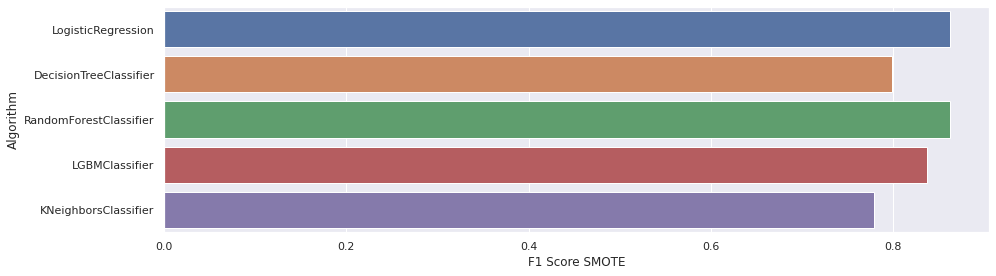

In [63]:
# Plot F1 Score from SMOTE Data Train

plt.figure(figsize=(14,4))
sns.barplot(data=df_algo_smote,y='Algorithm',x='F1 Score SMOTE')
plt.tight_layout()

From the result, the normal train data give better result than smote data. So next, I will use the normal data (without smote) which are Logistic Regression

### Logistic Regression 

In [64]:
# Modelling and fitting
lr = LogisticRegression(random_state=13)
lr.fit(X_train,y_train)

# predicting
prediction_lr = lr.predict(X_test)

# Evaluation
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,prediction_lr))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_lr).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)


=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185


tn :  26  fp :  38  fn :  3  tp :  118


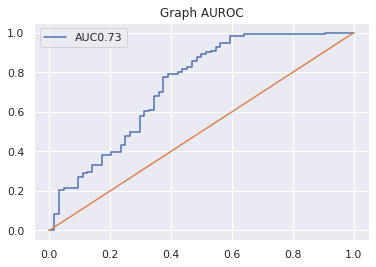

In [65]:
# -------- AUC-ROC Curve
pred_proba = lr.predict_proba(X_test)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

In [66]:
# -------- Save / Dump Model
from google.colab import files
import pickle

def local_persist(fname, modelname):
  fname = fname
  pickle.dump(modelname, open(fname, 'wb'))
  files.download(fname)

local_persist('LogisticRegression.sav',lr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
df.to_csv('loloan.csv', index = False)

In [68]:
# -------- Save / Dump Scalernormal
def local_persist(fname, modelname):
  fname = fname
  pickle.dump(modelname, open(fname, 'wb'))
  files.download(fname)

local_persist('scalernormal_app.sav',scalernormal_app)
local_persist('scalernormal_co.sav',scalernormal_co)
local_persist('scalernormal_loanamount.sav',scalernormal_loanamount)
local_persist('scalernormal_term.sav',scalernormal_term)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>